In [1]:
#lOGISTIC REGRESSION COMPREHENSIVE EXPLORATION

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc

In [2]:
data=load_breast_cancer()
X=data.data
y=data.target
feature_names=data.feature_names

In [3]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=42
)

In [4]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [5]:
#2.Basic model
basic=LogisticRegression(max_iter=2000)
basic.fit(X_train,y_train)
print("Basic accuracy:",accuracy_score(y_test,basic.predict(X_test)))

Basic accuracy: 0.9824561403508771


In [6]:
#3. L1 vs L2 regularizaton
l1=LogisticRegression(penalty='l1',solver='liblinear',max_iter=2000)
l1.fit(X_train,y_train)
print(" L1 Accuracy:",accuracy_score(y_test,l1.predict(X_test)))

l2=LogisticRegression(penalty='l2',solver='liblinear',max_iter=2000)
l2.fit(X_train,y_train)
print(" L2 Accuracy:",accuracy_score(y_test,l2.predict(X_test)))

 L1 Accuracy: 0.9824561403508771
 L2 Accuracy: 0.9824561403508771


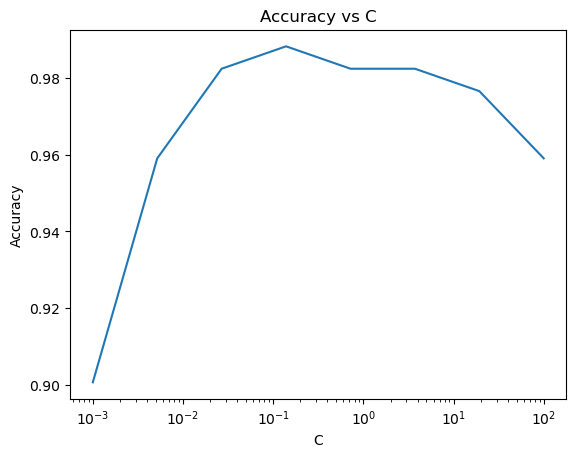

In [7]:
#4.Regularization strength
C_values=np.logspace(-3,2,8)
acc_list=[]
for C in C_values:
    model=LogisticRegression(C=C , max_iter=2000)
    model.fit(X_train,y_train)
    acc_list.append(accuracy_score(y_test,model.predict(X_test)))
plt.figure()
plt.plot(C_values,acc_list)
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Accuracy vs C")
plt.show()

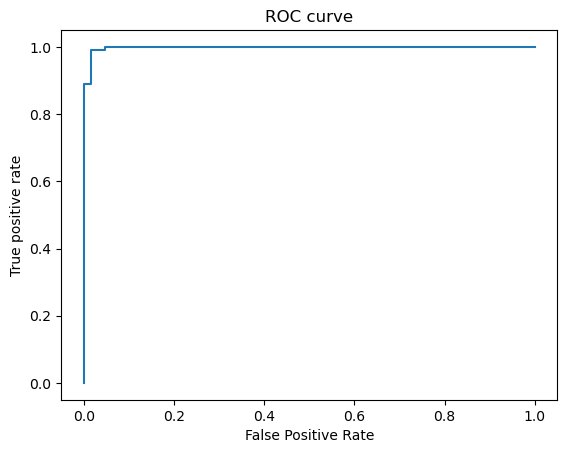

AUC: 0.9979423868312757


In [8]:
#5.ROC Curve
y_prob=l2.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.show()
print("AUC:",roc_auc)

In [9]:
#6.confusion matrix
print("Confusion Matrix:\n",confusion_matrix(y_test, l1.predict(X_test)))

Confusion Matrix:
 [[ 62   1]
 [  2 106]]


In [10]:
#7. cross validation
cv_score=cross_val_score(LogisticRegression(max_iter=2000),
                        scaler.fit_transform(X),y,cv=5)
print("cross validation accuracy",cv_score.mean())

cross validation accuracy 0.9806862288464524


In [11]:
#8.bias variance check
train_acc=accuracy_score(y_train,l2.predict(X_train))
test_acc=accuracy_score(y_test,l2.predict(X_test))
print("Train Accuracy:",train_acc)
print("Test Accuracy:",test_acc)

Train Accuracy: 0.9874371859296482
Test Accuracy: 0.9824561403508771
